In [1]:
import psycopg2
import pandas as pd
import pickle
import numpy as np
import missingno as mn

In [2]:
df_1yr = pd.read_pickle('fm_loan_data_1yr.pkl')
df_3yr = pd.read_pickle('fm_loan_data_3yr.pkl')
df_5yr = pd.read_pickle('fm_loan_data_5yr.pkl')
df_orig = pd.read_pickle('origination_data.pkl')
len(df_orig.index)

13373841

In [3]:
# Check to see if there are other values other than one in data set.
duplicate = df_1yr[df_1yr['curr_ln_delq_stas']!='1']
print(duplicate)

        ln_seq_number mth_reprt_prd  curr_actl_upb curr_ln_delq_stas  ln_age  \
8        F111Q1100999        201611            0.0                 R       0   
11       F111Q3071499        201402            0.0                 R       0   
16       F110Q1175867        201511            0.0                 R       0   
33       F109Q2522911        201004        24942.0                 2      11   
47       F109Q3049884        201006       239624.0                 2      10   
48       F109Q3049884        201007       239624.0                 3      11   
49       F109Q3049884        201008       239624.0                 4      12   
50       F109Q3049884        201104            0.0                 R       0   
54       F109Q3246495        201006            0.0                 2       8   
57       F108Q1012083        201208            0.0                 R       0   
60       F108Q1176480        200807       133000.0                 2       3   
63       F108Q1176480        201209     

In [4]:
list(df_orig)

['credit_score',
 'first_payment_date',
 'first_time_homebuyer_flag',
 'maturity_date',
 'msa_code',
 'mi_percent',
 'unit_cnt',
 'occupancy_status',
 'orig_cltv',
 'orig_debt_to_inc',
 'orig_upb',
 'orig_ltv',
 'orig_int_rate',
 'channel',
 'ppm_flag',
 'product_type',
 'property_st',
 'property_type',
 'postal_code',
 'ln_seq_number',
 'ln_purpose',
 'orig_ln_term',
 'borrower_cnt',
 'seller_name',
 'servicer_name',
 'super_confirm_flag',
 'yr1_def',
 'yr3_def',
 'yr5_def']

In [5]:
df_orig.head(10)

,credit_score,first_payment_date,first_time_homebuyer_flag,maturity_date,msa_code,mi_percent,unit_cnt,occupancy_status,orig_cltv,orig_debt_to_inc,...,ln_seq_number,ln_purpose,orig_ln_term,borrower_cnt,seller_name,servicer_name,super_confirm_flag,yr1_def,yr3_def,yr5_def
0,799.0,201708,9,203707,33340.0,0.0,1.0,P,65.0,31.0,...,F117Q2000001,C,240,2.0,Other sellers,"PNCBANK,NATL",None,,,
1,794.0,201708,9,204707,43580.0,0.0,1.0,I,73.0,44.0,...,F117Q2000002,C,360,1.0,Other sellers,Other servicers,None,,,
2,806.0,201708,9,204707,NaN,0.0,1.0,P,48.0,42.0,...,F117Q2000003,N,360,1.0,Other sellers,Other servicers,None,,,
3,751.0,201707,9,203206,33460.0,0.0,1.0,P,80.0,16.0,...,F117Q2000004,C,180,2.0,Other sellers,Other servicers,None,,,
4,751.0,201707,9,203206,33460.0,0.0,1.0,I,75.0,15.0,...,F117Q2000005,N,180,2.0,Other sellers,Other servicers,None,,,
5,761.0,201708,9,203207,24260.0,0.0,1.0,I,52.0,38.0,...,F117Q2000006,N,180,2.0,Other sellers,Other servicers,None,,,
6,789.0,201707,9,204706,24340.0,0.0,1.0,P,60.0,43.0,...,F117Q2000007,C,360,1.0,Other sellers,Other servicers,None,,,
7,795.0,201707,9,203706,NaN,0.0,1.0,P,80.0,41.0,...,F117Q2000008,N,240,1.0,Other sellers,"PNCBANK,NATL",None,,,
8,743.0,201706,9,203205,NaN,0.0,1.0,P,49.0,20.0,...,F117Q2000009,C,180,2.0,Other sellers,Other servicers,None,,,
9,714.0,201706,N,204705,NaN,30.0,1.0,P,95.0,13.0,...,F117Q2000010,P,360,1.0,Other sellers,Other servicers,None,,,


In [6]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13373841 entries, 0 to 13373840
Data columns (total 29 columns):
credit_score                 float64
first_payment_date           object
first_time_homebuyer_flag    object
maturity_date                object
msa_code                     float64
mi_percent                   float64
unit_cnt                     float64
occupancy_status             object
orig_cltv                    float64
orig_debt_to_inc             float64
orig_upb                     float64
orig_ltv                     float64
orig_int_rate                float64
channel                      object
ppm_flag                     object
product_type                 object
property_st                  object
property_type                object
postal_code                  float64
ln_seq_number                object
ln_purpose                   object
orig_ln_term                 object
borrower_cnt                 float64
seller_name                  object
servicer_n

In [7]:
# Removing loans with unknown performance since we cannot get value for our purpose

df_1yr = df_1yr[df_1yr.curr_ln_delq_stas != 'XX']
df_3yr = df_3yr[df_3yr.curr_ln_delq_stas != 'XX']
df_5yr = df_5yr[df_5yr.curr_ln_delq_stas != 'XX']

In [8]:
count = df_orig[df_orig['credit_score']== 9999]
count.count()

credit_score                 1085
first_payment_date           1085
first_time_homebuyer_flag    1085
maturity_date                1085
msa_code                      943
mi_percent                   1085
unit_cnt                     1085
occupancy_status             1085
orig_cltv                    1085
orig_debt_to_inc             1085
orig_upb                     1085
orig_ltv                     1085
orig_int_rate                1085
channel                      1085
ppm_flag                     1067
product_type                 1085
property_st                  1085
property_type                1085
postal_code                  1085
ln_seq_number                1085
ln_purpose                   1085
orig_ln_term                 1085
borrower_cnt                 1085
seller_name                  1085
servicer_name                1085
super_confirm_flag              0
yr1_def                      1085
yr3_def                      1085
yr5_def                      1085
dtype: int64

In [9]:
# removing outliers
# 1085 loans have 9999 value for creditscore
df_orig.loc[df_orig['credit_score'] == 9999, 'credit_score'] = np.nan #756.69
df_orig.loc[df_orig['first_time_homebuyer_flag'] == '9', 'first_time_homebuyer_flag'] = np.nan
df_orig['msa_code'].fillna(0, inplace=True)
# 50 loans have 999 value for mi-percent
df_orig.loc[df_orig['mi_percent'] == 999, 'mi_percent'] = np.nan
df_orig.loc[df_orig['mi_percent'] == 0, 'mi_percent'] = 0
df_orig.loc[df_orig['unit_cnt'] == 99, 'unit_cnt'] = np.nan
df_orig.loc[df_orig['occupancy_status'] == '9', 'occupancy_status'] = np.nan
df_orig.loc[df_orig['orig_cltv'] == 999, 'orig_cltv'] = np.nan
df_orig.loc[df_orig['orig_debt_to_inc'] == 999, 'orig_debt_to_inc'] = np.nan #35.38
df_orig.loc[df_orig['orig_ltv'] == 999, 'orig_ltv'] = np.nan #70.21
df_orig.loc[df_orig['channel'] == '9', 'channel'] = np.nan
df_orig.loc[df_orig['property_type'] == '99', 'property_type'] = np.nan
df_orig.loc[df_orig['ln_purpose'] == '9', 'property_type'] = np.nan
df_orig.loc[df_orig['borrower_cnt'] == 99, 'borrower_cnt'] = np.nan


In [10]:
list(df_1yr)

['ln_seq_number',
 'mth_reprt_prd',
 'curr_actl_upb',
 'curr_ln_delq_stas',
 'ln_age',
 'remng_mth',
 'rep_flag',
 'mod_flag',
 'zero_bal_cd',
 'zero_bal_eff_dt',
 'curr_int_rt',
 'curr_defrd_upb',
 'ddlpi',
 'mi_upb',
 'net_sls_amt',
 'non_mi_amt',
 'exp_amt',
 'lgl_cst',
 'other_cst',
 'ti_ins_cst',
 'misc_exp',
 'loss_cal',
 'mod_cst',
 'step_mod_flag',
 'dfrd_pmt_mod',
 'eltv',
 'credit_score',
 'first_payment_date',
 'first_time_homebuyer_flag',
 'maturity_date',
 'msa_code',
 'mi_percent',
 'unit_cnt',
 'occupancy_status',
 'orig_cltv',
 'orig_debt_to_inc',
 'orig_upb',
 'orig_ltv',
 'orig_int_rate',
 'channel',
 'ppm_flag',
 'product_type',
 'property_st',
 'property_type',
 'postal_code',
 'ln_seq_number',
 'ln_purpose',
 'orig_ln_term',
 'borrower_cnt',
 'seller_name',
 'servicer_name',
 'super_confirm_flag']

In [11]:
len(df_1yr.index)

657947

In [12]:
# Dropping duplicates so df can merge with df_orig
df_1yr = df_1yr.drop_duplicates('ln_seq_number')

In [13]:
len(df_1yr.index)

316489

In [14]:
len(df_3yr.index)

2428706

In [15]:
# Dropping duplicates so df can merge with df_orig
df_3yr = df_3yr.drop_duplicates('ln_seq_number')

In [16]:
len(df_3yr.index)

481490

In [17]:
len(df_5yr.index)

1964733

In [18]:
# Dropping duplicates so df can merge with df_orig
df_5yr = df_5yr.drop_duplicates('ln_seq_number')

In [19]:
len(df_5yr.index)

308464

In [20]:
# Remove additional loan_id from data frame
df_1yr = df_1yr.loc[:,~df_1yr.columns.duplicated()]
df_3yr = df_3yr.loc[:,~df_3yr.columns.duplicated()]
df_5yr = df_5yr.loc[:,~df_5yr.columns.duplicated()]

In [21]:
# Merging unique performance file 1yr with df_orig
df_orig = pd.merge(df_orig, df_1yr [['ln_seq_number','curr_ln_delq_stas']], on='ln_seq_number', how='left')

In [22]:
# renaming newly merged column from curr_ln_delq_stas to curr_ln_delq_stas_1yr
df_orig.rename(columns = {'curr_ln_delq_stas':'curr_ln_delq_stas_1yr'}, inplace = True)

In [23]:
# Merging unique performace file 3yr with df_orig
df_orig = pd.merge(df_orig, df_3yr [['ln_seq_number','curr_ln_delq_stas']], on='ln_seq_number', how='left')

In [24]:
# renaming newly merged column from curr_ln_delq_stas to curr_ln_delq_stas_3yr
df_orig.rename(columns = {'curr_ln_delq_stas':'curr_ln_delq_stas_3yr'}, inplace = True)

In [25]:
# Merging unique performace file 5yr with df_orig
df_orig = pd.merge(df_orig, df_5yr [['ln_seq_number','curr_ln_delq_stas']], on='ln_seq_number', how='left')

In [26]:
# renaming newly merged column from curr_ln_delq_stas to curr_ln_delq_stas_5yr
df_orig.rename(columns = {'curr_ln_delq_stas':'curr_ln_delq_stas_5yr'}, inplace = True)

In [27]:
pd.set_option('display.max_columns',36)
df_orig.head(1)

,credit_score,first_payment_date,first_time_homebuyer_flag,maturity_date,msa_code,mi_percent,unit_cnt,occupancy_status,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,channel,ppm_flag,product_type,property_st,property_type,postal_code,ln_seq_number,ln_purpose,orig_ln_term,borrower_cnt,seller_name,servicer_name,super_confirm_flag,yr1_def,yr3_def,yr5_def,curr_ln_delq_stas_1yr,curr_ln_delq_stas_3yr,curr_ln_delq_stas_5yr
0,799.0,201708,NaN,203707,33340.0,0.0,1.0,P,65.0,31.0,230000.0,65.0,4.0,R,N,FRM,WI,SF,53100.0,F117Q2000001,C,240,2.0,Other sellers,"PNCBANK,NATL",None,,,,NaN,NaN,NaN


In [28]:
df_orig['curr_ln_delq_stas_1yr'].fillna(0, inplace=True)
df_orig['curr_ln_delq_stas_1yr'] = np.where(df_orig['curr_ln_delq_stas_1yr'] != 0, 1, df_orig['curr_ln_delq_stas_1yr'])

In [29]:
df_orig['curr_ln_delq_stas_3yr'].fillna(0, inplace=True)
df_orig['curr_ln_delq_stas_3yr'] = np.where(df_orig['curr_ln_delq_stas_3yr'] != 0, 1, df_orig['curr_ln_delq_stas_3yr'])

In [30]:
df_orig['curr_ln_delq_stas_5yr'].fillna(0, inplace=True)
df_orig['curr_ln_delq_stas_5yr'] = np.where(df_orig['curr_ln_delq_stas_5yr'] != 0, 1, df_orig['curr_ln_delq_stas_5yr'])

In [31]:
df_orig.head(15)

,credit_score,first_payment_date,first_time_homebuyer_flag,maturity_date,msa_code,mi_percent,unit_cnt,occupancy_status,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,channel,ppm_flag,product_type,property_st,property_type,postal_code,ln_seq_number,ln_purpose,orig_ln_term,borrower_cnt,seller_name,servicer_name,super_confirm_flag,yr1_def,yr3_def,yr5_def,curr_ln_delq_stas_1yr,curr_ln_delq_stas_3yr,curr_ln_delq_stas_5yr
0,799.0,201708,NaN,203707,33340.0,0.0,1.0,P,65.0,31.0,230000.0,65.0,4.0,R,N,FRM,WI,SF,53100.0,F117Q2000001,C,240,2.0,Other sellers,"PNCBANK,NATL",None,,,,0,0,0
1,794.0,201708,NaN,204707,43580.0,0.0,1.0,I,73.0,44.0,80000.0,73.0,5.0,R,N,FRM,IA,SF,51000.0,F117Q2000002,C,360,1.0,Other sellers,Other servicers,None,,,,0,0,0
2,806.0,201708,NaN,204707,0.0,0.0,1.0,P,48.0,42.0,63000.0,48.0,4.0,R,N,FRM,KS,SF,67900.0,F117Q2000003,N,360,1.0,Other sellers,Other servicers,None,,,,0,0,0
3,751.0,201707,NaN,203206,33460.0,0.0,1.0,P,80.0,16.0,424000.0,80.0,3.0,R,N,FRM,MN,SF,55000.0,F117Q2000004,C,180,2.0,Other sellers,Other servicers,None,,,,0,0,0
4,751.0,201707,NaN,203206,33460.0,0.0,1.0,I,75.0,15.0,100000.0,75.0,4.0,R,N,FRM,MN,CO,55100.0,F117Q2000005,N,180,2.0,Other sellers,Other servicers,None,,,,0,0,0
5,761.0,201708,NaN,203207,24260.0,0.0,1.0,I,52.0,38.0,49000.0,52.0,4.0,R,N,FRM,NE,SF,68800.0,F117Q2000006,N,180,2.0,Other sellers,Other servicers,None,,,,0,0,0
6,789.0,201707,NaN,204706,24340.0,0.0,1.0,P,60.0,43.0,135000.0,60.0,4.0,R,N,FRM,MI,SF,49400.0,F117Q2000007,C,360,1.0,Other sellers,Other servicers,None,,,,0,0,0
7,795.0,201707,NaN,203706,0.0,0.0,1.0,P,80.0,41.0,172000.0,80.0,4.0,R,N,FRM,PA,SF,15500.0,F117Q2000008,N,240,1.0,Other sellers,"PNCBANK,NATL",None,,,,0,0,0
8,743.0,201706,NaN,203205,0.0,0.0,1.0,P,49.0,20.0,71000.0,49.0,3.0,R,N,FRM,OH,SF,43300.0,F117Q2000009,C,180,2.0,Other sellers,Other servicers,None,,,,0,0,0
9,714.0,201706,N,204705,0.0,30.0,1.0,P,95.0,13.0,46000.0,95.0,4.0,R,N,FRM,KS,SF,67900.0,F117Q2000010,P,360,1.0,Other sellers,Other servicers,None,,,,0,0,0


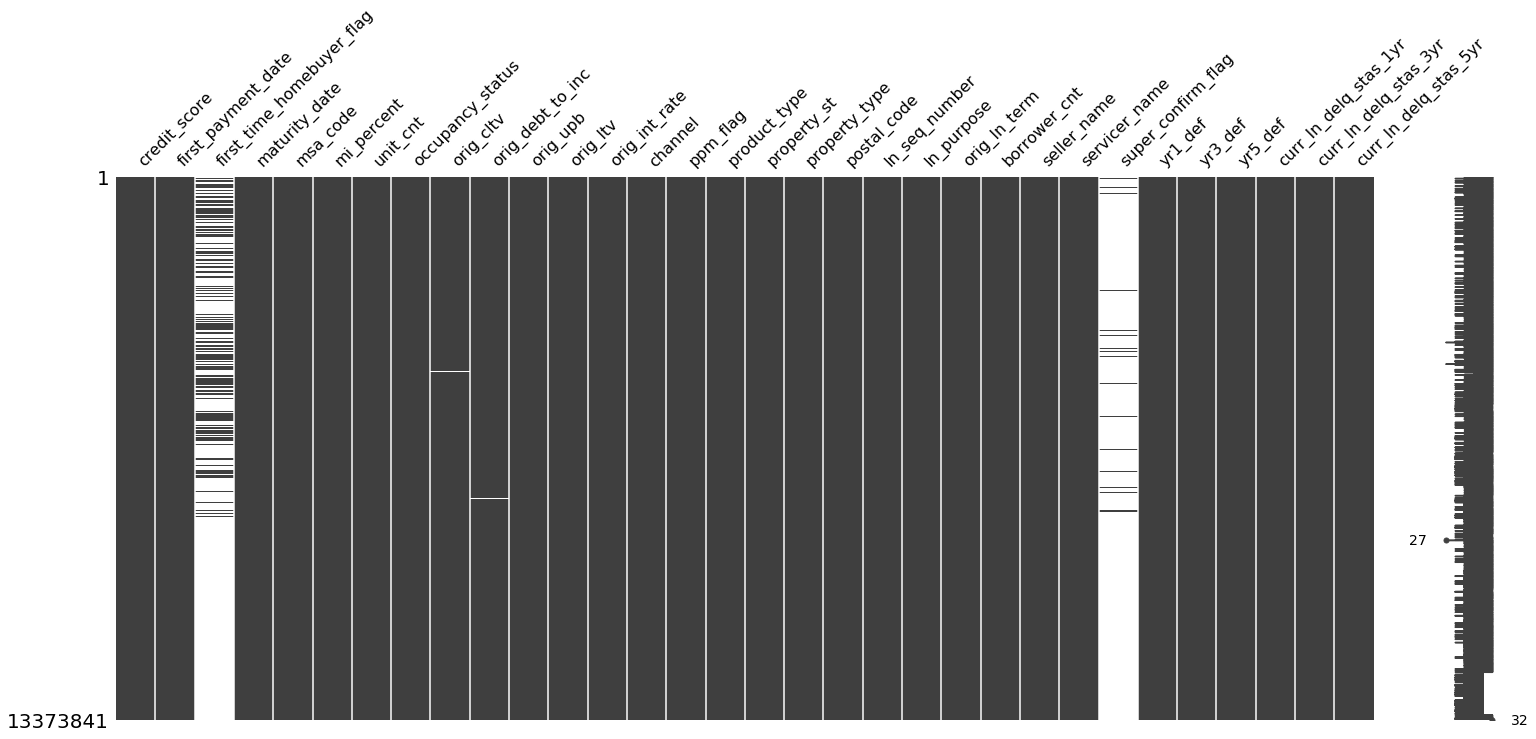

In [32]:
mn.matrix(df_orig)

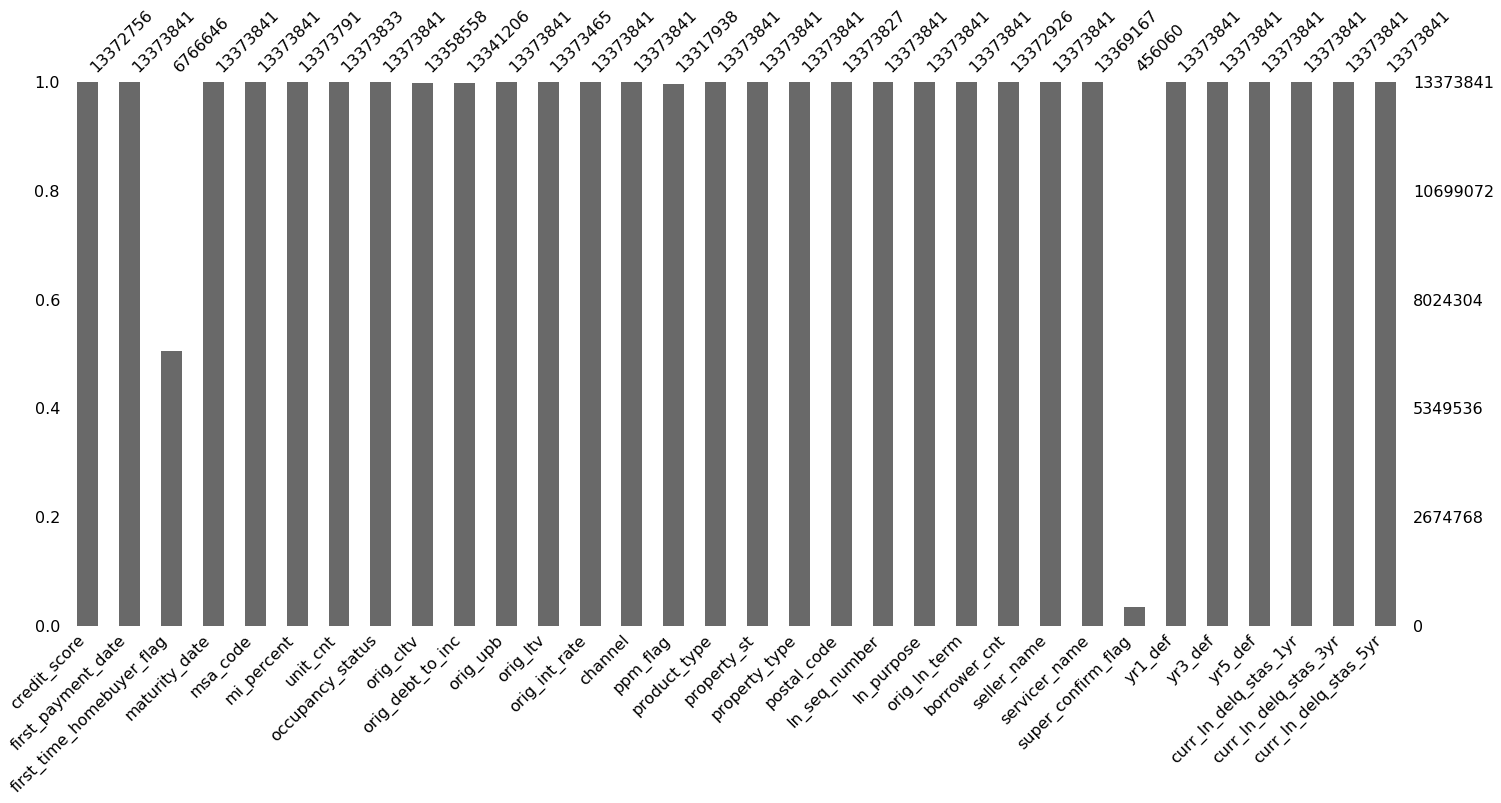

In [33]:
mn.bar(df_orig)

In [34]:
# high number of null values for these columns we dropped
df_orig = df_orig.drop(['first_time_homebuyer_flag', 'super_confirm_flag'], axis = 1 )

In [35]:
df_orig.describe(include='all')

,credit_score,first_payment_date,maturity_date,msa_code,mi_percent,unit_cnt,occupancy_status,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,channel,ppm_flag,product_type,property_st,property_type,postal_code,ln_seq_number,ln_purpose,orig_ln_term,borrower_cnt,seller_name,servicer_name,yr1_def,yr3_def,yr5_def,curr_ln_delq_stas_1yr,curr_ln_delq_stas_3yr,curr_ln_delq_stas_5yr
count,1.337276e+07,13373841,13373841,1.337384e+07,1.337379e+07,1.337383e+07,13373841,1.335856e+07,1.334121e+07,1.337384e+07,1.337346e+07,1.337384e+07,13373841,13317938,13373841,13373841,13373841,1.337383e+07,13373841,13373841,13373841,1.337293e+07,13373841,13369167,13373841,13373841,13373841,13373841.0,13373841.0,13373841.0
unique,NaN,135,439,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,4,2,1,54,5,NaN,13080616,3,309,NaN,62,56,1,1,1,2.0,2.0,2.0
top,NaN,200905,203904,NaN,NaN,NaN,P,NaN,NaN,NaN,NaN,NaN,R,N,FRM,CA,SF,NaN,F117Q2121250,P,360,NaN,Other sellers,Other servicers,,,,0.0,0.0,0.0
freq,NaN,225941,179726,NaN,NaN,NaN,11931002,NaN,NaN,NaN,NaN,NaN,7214760,13317923,13373841,1885121,9289338,NaN,2,5168877,9611797,NaN,4088186,3706749,13373841,13373841,13373841,13048744.0,12891782.0,13065377.0
mean,7.559376e+02,NaN,NaN,2.655383e+04,4.277585e+00,1.027056e+00,NaN,7.105756e+01,3.301805e+01,2.216203e+05,7.018288e+01,4.404127e+00,NaN,NaN,NaN,NaN,NaN,5.420319e+04,NaN,NaN,NaN,1.562352e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.375156e+01,NaN,NaN,1.454925e+04,9.796882e+00,2.196198e-01,NaN,1.709317e+01,1.044668e+01,1.195769e+05,1.722776e+01,8.675285e-01,NaN,NaN,NaN,NaN,NaN,3.011585e+04,NaN,NaN,NaN,4.960970e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.000000e+02,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,NaN,6.000000e+00,1.000000e+00,5.000000e+03,6.000000e+00,2.000000e+00,NaN,NaN,NaN,NaN,NaN,6.000000e+02,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.270000e+02,NaN,NaN,1.658000e+04,0.000000e+00,1.000000e+00,NaN,6.100000e+01,2.500000e+01,1.300000e+05,6.000000e+01,4.000000e+00,NaN,NaN,NaN,NaN,NaN,2.930000e+04,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.660000e+02,NaN,NaN,2.940400e+04,0.000000e+00,1.000000e+00,NaN,7.500000e+01,3.400000e+01,1.980000e+05,7.500000e+01,4.000000e+00,NaN,NaN,NaN,NaN,NaN,5.420000e+04,NaN,NaN,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.910000e+02,NaN,NaN,3.890000e+04,0.000000e+00,1.000000e+00,NaN,8.000000e+01,4.100000e+01,2.960000e+05,8.000000e+01,5.000000e+00,NaN,NaN,NaN,NaN,NaN,8.370000e+04,NaN,NaN,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# 1085 loans have 999 value for creditscore
df_orig['credit_score'].fillna(756.69, inplace=True)
# 50 loans have 999 value for mi-percent
df_orig['msa_code'].fillna(0, inplace=True)
df_orig['mi_percent'].fillna(4.27, inplace=True)
df_orig['unit_cnt'].fillna(1, inplace=True)
df_orig['occupancy_status'].fillna('na', inplace=True)
df_orig['orig_cltv'].fillna(7.1, inplace=True)
df_orig['orig_debt_to_inc'].fillna(35.38, inplace=True)
df_orig['orig_upb'].fillna(2.2, inplace=True)
df_orig['orig_ltv'].fillna(70.21, inplace=True)
df_orig['channel'].fillna('na', inplace=True)
df_orig['property_type'].fillna('na', inplace=True)
df_orig['ln_purpose'].fillna('na', inplace=True)
df_orig['borrower_cnt'].fillna('0', inplace=True)
df_orig['postal_code'].fillna(0, inplace=True)

In [37]:
# downcasting float columns
df_orig['credit_score'] = pd.to_numeric(df_orig['credit_score'], downcast='float')
df_orig['msa_code'] = pd.to_numeric(df_orig['msa_code'], downcast='float')
df_orig['mi_percent'] = pd.to_numeric(df_orig['mi_percent'], downcast='float')
df_orig['unit_cnt'] = pd.to_numeric(df_orig['unit_cnt'], downcast='float')
df_orig['orig_cltv'] = pd.to_numeric(df_orig['orig_cltv'], downcast='float')
df_orig['orig_debt_to_inc'] = pd.to_numeric(df_orig['orig_debt_to_inc'], downcast='float')
df_orig['orig_upb'] = pd.to_numeric(df_orig['orig_upb'], downcast='float')
df_orig['orig_ltv'] = pd.to_numeric(df_orig['orig_ltv'], downcast='float')
df_orig['orig_int_rate'] = pd.to_numeric(df_orig['orig_int_rate'], downcast='float')
df_orig['postal_code'] = pd.to_numeric(df_orig['postal_code'], downcast='float')

In [38]:
# orig loan term needs to be converted to int from object
df_orig['orig_ln_term'] = df_orig['orig_ln_term'].astype('int16')

In [39]:
len(df_orig.index)

13373841

In [40]:
# Change data type to float from object then round down in next cell to change into int
df_orig['curr_ln_delq_stas_1yr'] = df_orig['curr_ln_delq_stas_1yr'].astype(float)
df_orig['curr_ln_delq_stas_3yr'] = df_orig['curr_ln_delq_stas_3yr'].astype(float)
df_orig['curr_ln_delq_stas_5yr'] = df_orig['curr_ln_delq_stas_5yr'].astype(float)

In [41]:
df_orig['curr_ln_delq_stas_1yr'] = df_orig['curr_ln_delq_stas_1yr'].round(0).astype('int16')
df_orig['curr_ln_delq_stas_3yr'] = df_orig['curr_ln_delq_stas_3yr'].round(0).astype('int16')
df_orig['curr_ln_delq_stas_5yr'] = df_orig['curr_ln_delq_stas_5yr'].round(0).astype('int16')

In [42]:
df_orig3=df_orig

In [43]:
df_orig.head()

,credit_score,first_payment_date,maturity_date,msa_code,mi_percent,unit_cnt,occupancy_status,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,channel,ppm_flag,product_type,property_st,property_type,postal_code,ln_seq_number,ln_purpose,orig_ln_term,borrower_cnt,seller_name,servicer_name,yr1_def,yr3_def,yr5_def,curr_ln_delq_stas_1yr,curr_ln_delq_stas_3yr,curr_ln_delq_stas_5yr
0,799.0,201708,203707,33340.0,0.0,1.0,P,65.0,31.0,230000.0,65.0,4.0,R,N,FRM,WI,SF,53100.0,F117Q2000001,C,240,2,Other sellers,"PNCBANK,NATL",,,,0,0,0
1,794.0,201708,204707,43580.0,0.0,1.0,I,73.0,44.0,80000.0,73.0,5.0,R,N,FRM,IA,SF,51000.0,F117Q2000002,C,360,1,Other sellers,Other servicers,,,,0,0,0
2,806.0,201708,204707,0.0,0.0,1.0,P,48.0,42.0,63000.0,48.0,4.0,R,N,FRM,KS,SF,67900.0,F117Q2000003,N,360,1,Other sellers,Other servicers,,,,0,0,0
3,751.0,201707,203206,33460.0,0.0,1.0,P,80.0,16.0,424000.0,80.0,3.0,R,N,FRM,MN,SF,55000.0,F117Q2000004,C,180,2,Other sellers,Other servicers,,,,0,0,0
4,751.0,201707,203206,33460.0,0.0,1.0,I,75.0,15.0,100000.0,75.0,4.0,R,N,FRM,MN,CO,55100.0,F117Q2000005,N,180,2,Other sellers,Other servicers,,,,0,0,0


In [44]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13373841 entries, 0 to 13373840
Data columns (total 30 columns):
credit_score             float32
first_payment_date       object
maturity_date            object
msa_code                 float32
mi_percent               float32
unit_cnt                 float32
occupancy_status         object
orig_cltv                float32
orig_debt_to_inc         float32
orig_upb                 float32
orig_ltv                 float32
orig_int_rate            float32
channel                  object
ppm_flag                 object
product_type             object
property_st              object
property_type            object
postal_code              float32
ln_seq_number            object
ln_purpose               object
orig_ln_term             int16
borrower_cnt             object
seller_name              object
servicer_name            object
yr1_def                  object
yr3_def                  object
yr5_def                  object
curr_ln_delq

In [45]:
df_orig.describe(include='all')


,credit_score,first_payment_date,maturity_date,msa_code,mi_percent,unit_cnt,occupancy_status,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,channel,ppm_flag,product_type,property_st,property_type,postal_code,ln_seq_number,ln_purpose,orig_ln_term,borrower_cnt,seller_name,servicer_name,yr1_def,yr3_def,yr5_def,curr_ln_delq_stas_1yr,curr_ln_delq_stas_3yr,curr_ln_delq_stas_5yr
count,1.337384e+07,13373841,13373841,1.337384e+07,1.337384e+07,1.337384e+07,13373841,1.337384e+07,1.337384e+07,1.337384e+07,1.337384e+07,1.337384e+07,13373841,13317938,13373841,13373841,13373841,1.337383e+07,13373841,13373841,1.337384e+07,13373841.0,13373841,13369167,13373841,13373841,13373841,1.337384e+07,1.337384e+07,1.337384e+07
unique,NaN,135,439,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,4,2,1,54,5,NaN,13080616,3,NaN,3.0,62,56,1,1,1,NaN,NaN,NaN
top,NaN,200905,203904,NaN,NaN,NaN,P,NaN,NaN,NaN,NaN,NaN,R,N,FRM,CA,SF,NaN,F117Q2121250,P,NaN,2.0,Other sellers,Other servicers,,,,NaN,NaN,NaN
freq,NaN,225941,179726,NaN,NaN,NaN,11931002,NaN,NaN,NaN,NaN,NaN,7214760,13317923,13373841,1885121,9289338,NaN,2,5168877,NaN,7520295.0,4088186,3706749,13373841,13373841,13373841,NaN,NaN,NaN
mean,8.183811e+02,NaN,NaN,2.630184e+04,4.281655e+00,1.027056e+00,NaN,6.756713e+01,3.318289e+01,2.225188e+05,6.712202e+01,4.357161e+00,NaN,NaN,NaN,NaN,NaN,5.273064e+04,NaN,NaN,3.121720e+02,NaN,NaN,NaN,NaN,NaN,NaN,2.430842e-02,3.604492e-02,2.306473e-02
std,7.519627e+01,NaN,NaN,1.458256e+04,9.243294e+00,2.178807e-01,NaN,1.761099e+01,1.035876e+01,1.178310e+05,1.743861e+01,8.750008e-01,NaN,NaN,NaN,NaN,NaN,2.997023e+04,NaN,NaN,7.878818e+01,NaN,NaN,NaN,NaN,NaN,NaN,1.540050e-01,1.864019e-01,1.501091e-01
min,3.000000e+02,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,NaN,6.000000e+00,1.000000e+00,5.000000e+03,6.000000e+00,2.000000e+00,NaN,NaN,NaN,NaN,NaN,6.000000e+02,NaN,NaN,5.400000e+01,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.270000e+02,NaN,NaN,1.658000e+04,0.000000e+00,1.000000e+00,NaN,6.100000e+01,2.500000e+01,1.300000e+05,6.000000e+01,4.000000e+00,NaN,NaN,NaN,NaN,NaN,2.930000e+04,NaN,NaN,2.400000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.660000e+02,NaN,NaN,2.940400e+04,0.000000e+00,1.000000e+00,NaN,7.500000e+01,3.400000e+01,1.980000e+05,7.500000e+01,4.000000e+00,NaN,NaN,NaN,NaN,NaN,5.420000e+04,NaN,NaN,3.600000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.910000e+02,NaN,NaN,3.890000e+04,0.000000e+00,1.000000e+00,NaN,8.000000e+01,4.100000e+01,2.960000e+05,8.000000e+01,5.000000e+00,NaN,NaN,NaN,NaN,NaN,8.370000e+04,NaN,NaN,3.600000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00


In [46]:
# Change firstpayment, maturity date and borrower cnt to int
df_orig['first_payment_date'] = df_orig['first_payment_date'].astype(float)
df_orig['maturity_date'] = df_orig['maturity_date'].astype(float)
df_orig['borrower_cnt'] = df_orig['borrower_cnt'].astype(float)

In [47]:
# populating yrX_def columns which will be used for analysis
df_orig['yr1_def'] = df_orig['curr_ln_delq_stas_1yr']
df_orig['yr3_def'] = df_orig['curr_ln_delq_stas_1yr'] + df_orig['curr_ln_delq_stas_3yr']
df_orig['yr5_def'] = df_orig['curr_ln_delq_stas_1yr'] + df_orig['curr_ln_delq_stas_3yr'] + df_orig['curr_ln_delq_stas_5yr']
df_orig['yr1_def'] = np.where(df_orig['yr1_def'] != 0, 1, df_orig['yr1_def'])
df_orig['yr3_def'] = np.where(df_orig['yr3_def'] != 0, 1, df_orig['yr3_def'])
df_orig['yr5_def'] = np.where(df_orig['yr5_def'] != 0, 1, df_orig['yr5_def'])

In [48]:
# binning upb since value range is so high. 
# binning on quartiles 1:135,000| 2:205,000| 3:303,000| 4:1,203,000
df_orig['bin_orig_upb'] = pd.cut(df_orig['orig_upb'], [0, 135000, 205000, 303000, 1203000],
                                 labels=[1, 2, 3, 4])


In [49]:
# Binning First Payment Date into year
df_orig['first_payment_date'] = pd.cut(df_orig['first_payment_date'], 
                                       [0, 200812, 200912, 201012, 201112, 201212,
                                        201312, 201412, 201512,
                                        201612, 201712, 201812, 201901                               
                                        ], labels=[2008, 2009, 2010, 2011, 2012, 2013, 2014,
                                        2015, 2016, 2017, 2018, 2019])

In [50]:
df_orig['bin_orig_upb'] = df_orig['bin_orig_upb'].astype('int16')

In [51]:
# inorder to capture relevent to the current economic us housing market we chose a more current set 2012-2017
df = df_orig[df_orig['first_payment_date'] >= 2012]

In [52]:
len(df.index)

8194133

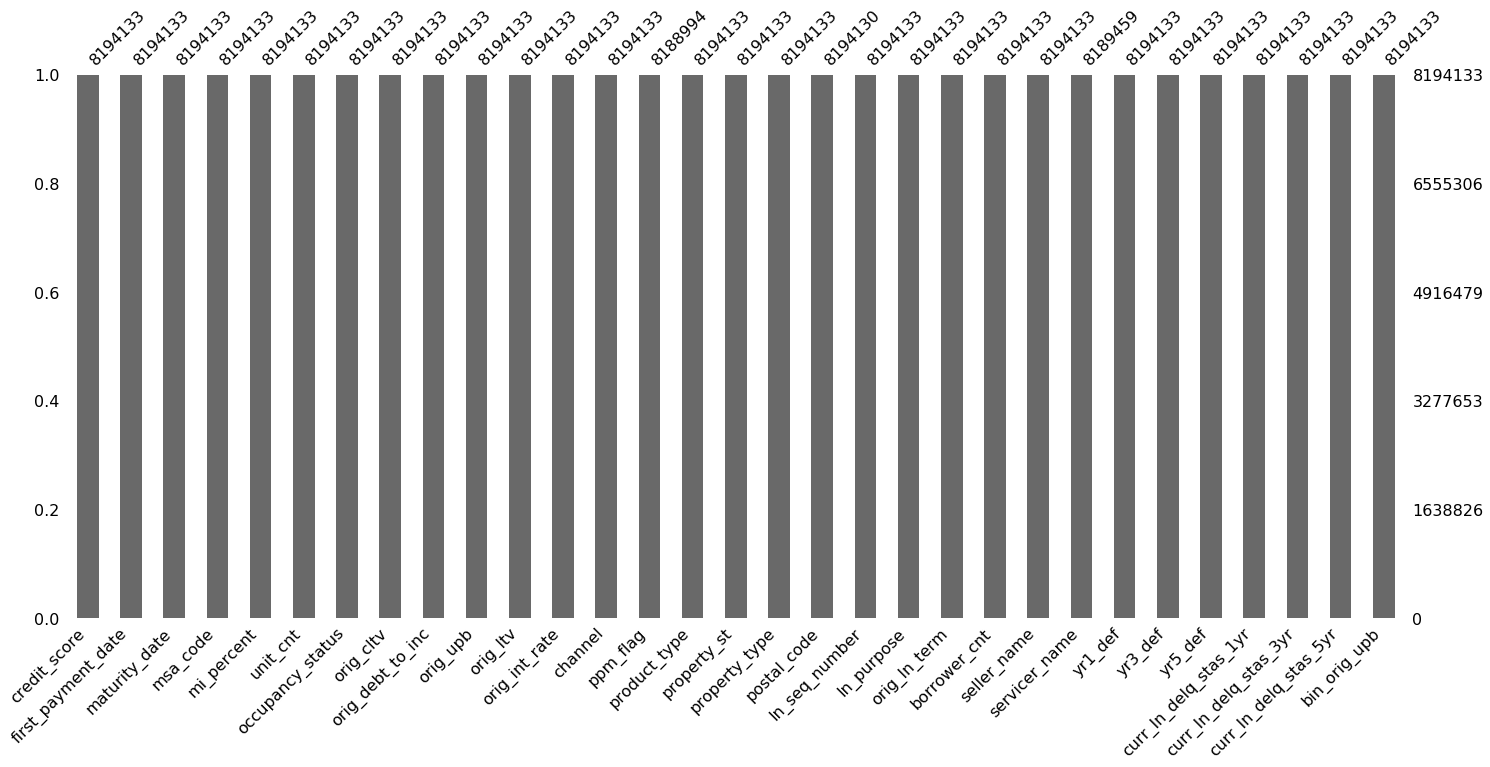

In [53]:
mn.bar(df)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8194133 entries, 0 to 13373820
Data columns (total 31 columns):
credit_score             float32
first_payment_date       category
maturity_date            float64
msa_code                 float32
mi_percent               float32
unit_cnt                 float32
occupancy_status         object
orig_cltv                float32
orig_debt_to_inc         float32
orig_upb                 float32
orig_ltv                 float32
orig_int_rate            float32
channel                  object
ppm_flag                 object
product_type             object
property_st              object
property_type            object
postal_code              float32
ln_seq_number            object
ln_purpose               object
orig_ln_term             int16
borrower_cnt             float64
seller_name              object
servicer_name            object
yr1_def                  int16
yr3_def                  int16
yr5_def                  int16
curr_ln_delq

In [55]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,credit_score,maturity_date,msa_code,mi_percent,unit_cnt,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,postal_code,orig_ln_term,borrower_cnt,yr1_def,yr3_def,yr5_def,curr_ln_delq_stas_1yr,curr_ln_delq_stas_3yr,curr_ln_delq_stas_5yr,bin_orig_upb
count,8194133.00,8194133.00,8194133.00,8194133.00,8194133.00,8194133.00,8194133.00,8194133.00,8194133.00,8194133.00,8194130.00,8194133.00,8194133.00,8194133.00,8194133.00,8194133.00,8194133.00,8194133.00,8194133.00,8194133.00
mean,767.93,204067.60,27184.05,5.53,1.03,71.37,33.36,229079.44,70.84,4.01,55687.97,311.75,1.54,0.02,0.04,0.05,0.02,0.03,0.01,2.50
std,45.27,707.73,14313.31,10.31,0.23,16.99,9.57,119670.20,16.99,0.59,29868.97,78.96,0.50,0.14,0.19,0.21,0.14,0.16,0.11,1.12
min,516.00,201612.00,0.00,0.00,1.00,6.00,1.00,6000.00,6.00,2.00,600.00,54.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,725.00,203410.00,16860.00,0.00,1.00,64.00,26.00,135000.00,63.00,4.00,30000.00,240.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,765.00,204402.00,29820.00,0.00,1.00,77.00,34.00,205000.00,76.00,4.00,55100.00,360.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
75%,790.00,204606.00,39300.00,0.00,1.00,80.00,41.00,303000.00,80.00,4.00,84300.00,360.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
max,850.00,204812.00,49740.00,55.00,4.00,212.00,65.00,1203000.00,105.00,9.00,99900.00,366.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,4.00


In [56]:
#Script from http://veekaybee.github.io/how-big-of-a-sample-size-do-you-need/ on how to calculate sample size, adjusted for my own population size
#and confidence intervals
#Original here: http://bc-forensics.com/?p=15

import math
 
# SUPPORTED CONFIDENCE LEVELS: 50%, 68%, 90%, 95%, and 99%
confidence_level_constant = [50,.67], [68,.99], [90,1.64], [95,1.96], [99,2.57]
 
# CALCULATE THE SAMPLE SIZE
def sample_size(population_size, confidence_level, confidence_interval):
  Z = 0.0
  p = 0.5
  e = confidence_interval/100.0
  N = population_size
  n_0 = 0.0
  n = 0.0
 
  # LOOP THROUGH SUPPORTED CONFIDENCE LEVELS AND FIND THE NUM STD
  # DEVIATIONS FOR THAT CONFIDENCE LEVEL
  for i in confidence_level_constant:
    if i[0] == confidence_level:
      Z = i[1]
 
  if Z == 0.0:
    return -1
 
  # CALC SAMPLE SIZE
  n_0 = ((Z**2) * p * (1-p)) / (e**2)
 
  # ADJUST SAMPLE SIZE FOR FINITE POPULATION
  n = n_0 / (1 + ((n_0 - 1) / float(N)) )
 
  return int(math.ceil(n)) # THE SAMPLE SIZE
 
def main():
  sample_sz = 0
  population_sz = 8194133
  confidence_level = 95.0
  confidence_interval = .08  #margin of error 
 
  sample_sz = sample_size(population_sz, confidence_level, confidence_interval)
 
  print ("SAMPLE SIZE: %d" % sample_sz)
 
if __name__ == "__main__":
  main()

SAMPLE SIZE: 1268348


In [57]:
df=df.sample(frac=.18,random_state = 2)

In [59]:
len(df)

1474944

In [58]:
df.to_pickle('orig_final.pkl')